In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('DADOS_TCC.xlsx')

In [3]:
df = df.rename(columns={"Listagem de pré-embarque, Período considerado: 01/01/2002 até 30/06/2023": "Cliente", "Unnamed: 2": "Ano da Operação","Unnamed: 4": "Valor Desembolsado em Reais", "Unnamed: 1": "UF", "Unnamed: 5": "Setor CNAE", "Unnamed: 6": "Subsetor CNAE Agrupado",
                   "Unnamed: 7": "Porte do cliente", "Unnamed: 8": "Natureza", "Unnamed: 9": "Instituição Financeira Credenciada", "Unnamed: 3": "Valor da Operação em R$"})

In [4]:
df['Valor Desembolsado em Reais'] = pd.to_numeric(df['Valor Desembolsado em Reais'], errors='coerce')
df.dropna(subset=['Valor Desembolsado em Reais'], inplace=True)

## Definindo as regiões

In [5]:
df['UF'] = df['UF'].str.strip()
unique_ufs = df['UF'].unique()

In [6]:
Regiãos = {
    'Sudeste': ['SP', 'RJ', 'MG', 'ES'],
    'Sul': ['PR', 'SC', 'RS'],
    'Centro-Oeste': ['MT', 'MS', 'GO', 'DF', 'TO'],
    'Norte': ['AM', 'PA', 'RO', 'RR', 'AC', 'AP'],
    'Nordeste': ['BA', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE']
}

uf_to_Região = {uf: Região for Região, ufs in Regiãos.items() for uf in ufs}

df['Região'] = df['UF'].map(uf_to_Região)


## Desembolso por UF 

In [7]:
max_desembolso_per_uf = df.groupby('UF')['Valor Desembolsado em Reais'].max().reset_index()


max_values = df.groupby('UF')['Valor Desembolsado em Reais'].max()

max_values_sorted = max_values.sort_values(ascending=False)

# plt.figure(figsize=(10, 8))
# plt.bar(max_values_sorted.index, max_values_sorted.values, color='blue')
# plt.xlabel('UF')
# plt.ylabel('Valor Desembolsado (R$)')
# plt.title('Maior Valor Desembolsado por UF') 
# plt.xticks(rotation=45)  
# plt.tight_layout() 
# plt.show()

## Desembolso por UF sem SP

In [8]:
max_desembolso_per_uf = df.groupby('UF')['Valor Desembolsado em Reais'].max().reset_index()


max_values = df.groupby('UF')['Valor Desembolsado em Reais'].max()

max_values_sorted = max_values.sort_values(ascending=False)

max_values_sorted = max_values_sorted.drop('SP')

# plt.figure(figsize=(10, 8))
# plt.bar(max_values_sorted.index, max_values_sorted.values, color='blue')
# plt.xlabel('UF')
# plt.ylabel('Valor Desembolsado (R$)')
# plt.title('Maior Valor Desembolsado por UF') 
# plt.xticks(rotation=45)  
# plt.tight_layout() 
# plt.show()

## Valor desembolsado por setor CNAE - análise Regional

In [9]:
grouped_data = df.groupby(['Região', 'UF', 'Setor CNAE'])['Valor Desembolsado em Reais'].sum().reset_index()

pivot_table = grouped_data.pivot_table(index=['Região', 'UF'], columns='Setor CNAE', values='Valor Desembolsado em Reais', aggfunc='sum')


In [10]:
# for Região in pivot_table.index.get_level_values(0).unique():
#     Regiãoal_data = pivot_table.xs(Região, level='Região')
#     Regiãoal_data.plot(kind='bar', figsize=(14, 7))
#     plt.title(f'Valor Desembolsado por Setor CNAE e UF no {Região}')
#     plt.ylabel('Valor Desembolsado em Reais')
#     plt.xlabel('UF e Setor CNAE')
#     plt.xticks(rotation=45)
#     plt.legend(title='Setor CNAE', bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.tight_layout()
#     plt.show()


## Valor desembolsado por setor CNAE - análise Regional (sem Indústria da Transformação)

In [11]:
# pivot_table2 = pivot_table.drop('INDUSTRIA DE TRANSFORMAÇÃO', axis=1)
# for Região in pivot_table2.index.get_level_values(0).unique():
#     Regiãoal_data = pivot_table2.xs(Região, level='Região')
#     Regiãoal_data.plot(kind='bar', figsize=(14, 7))
#     plt.title(f'Valor Desembolsado por Setor CNAE e UF no {Região}')
#     plt.ylabel('Valor Desembolsado em Reais')
#     plt.xlabel('UF e Setor CNAE')
#     plt.xticks(rotation=45)
#     plt.legend(title='Setor CNAE', bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.tight_layout()
#     plt.show()


##  Subsetor CNAE - Análise Regiãoal

In [12]:
grouped_data = df.groupby(['Região', 'UF', 'Subsetor CNAE Agrupado'])['Valor Desembolsado em Reais'].sum().reset_index()

pivot_table = grouped_data.pivot_table(index=['Região', 'UF'], columns='Subsetor CNAE Agrupado', values='Valor Desembolsado em Reais', aggfunc='sum')


In [13]:
# for Região in pivot_table.index.get_level_values(0).unique():
#     Regiãoal_data = pivot_table.xs(Região, level='Região')
#     Regiãoal_data.plot(kind='bar', figsize=(14, 7))
#     plt.title(f'Valor Desembolsado por Subsetor CNAE Agrupado e UF no {Região}')
#     plt.ylabel('Valor Desembolsado em Reais')
#     plt.xlabel('UF e Subsetor CNAE Agrupado')
#     plt.xticks(rotation=45)
#     plt.legend(title='Subsetor CNAE Agrupado', bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.tight_layout()
#     plt.show()


## Distribuição categórica

In [14]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# df.groupby('Região').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# df.groupby('Porte do cliente').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# df.groupby('Setor CNAE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)

## Análise Temporal

In [17]:
df['Ano da Operação'] = pd.to_datetime(df['Ano da Operação'], format='%Y')

In [18]:
yearly_data = df.groupby(df['Ano da Operação'].dt.year)['Valor da Operação em R$'].sum()
moving_average = yearly_data.rolling(window=3).mean()  

# plt.figure(figsize=(12, 6))
# plt.plot(yearly_data, marker='o', label='Investimento Anual')
# plt.plot(moving_average, color='red', linestyle='--', label='Média Móvel em 3 anos')
# plt.title('Valor anual desembolsado com média móvel')
# plt.xlabel('Ano')
# plt.ylabel('Valor desembolsado total (R$)')
# plt.legend()
# plt.grid(True)
# plt.show()


## Por setor

In [19]:
df['Year'] = pd.to_datetime(df['Ano da Operação'], format='%Y')

df['Valor da Operação em R$'] = df['Valor da Operação em R$'].astype(float)
sector_yearly_data = df.groupby([df['Year'].dt.year, 'Setor CNAE'])['Valor da Operação em R$'].sum().unstack()

# plt.figure(figsize=(14, 8))
# for column in sector_yearly_data.columns:
#     plt.plot(sector_yearly_data.index, sector_yearly_data[column], marker='', linestyle='-', label=column)
# plt.title('Valor anual por setor')
# plt.xlabel('Ano')
# plt.ylabel('Valor total (R$)')
# plt.legend(title='Setor', loc='upper right')
# plt.grid(True)
# plt.show()


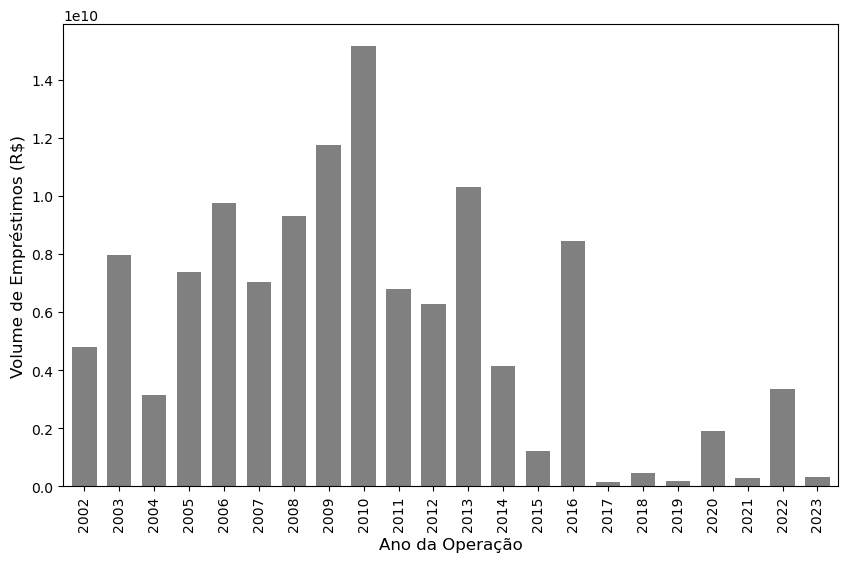

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'df' é o seu DataFrame

# Convertendo a coluna de datas para o tipo datetime
df['Ano da Operação'] = pd.to_datetime(df['Ano da Operação'])

# Extraindo o ano da data
df['Year'] = df['Ano da Operação'].dt.year

# Agrupando os dados por ano e somando os valores desembolsados
agrupado = df.groupby('Year')['Valor Desembolsado em Reais'].sum()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
agrupado.plot(kind='bar', color='gray', width= 0.7)

# Adicionando título e rótulos
plt.xlabel('Ano da Operação', fontsize = 12)
plt.ylabel('Volume de Empréstimos (R$)', fontsize = 12)

# Mostrando o gráfico
plt.show()

ValueError: 'left' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

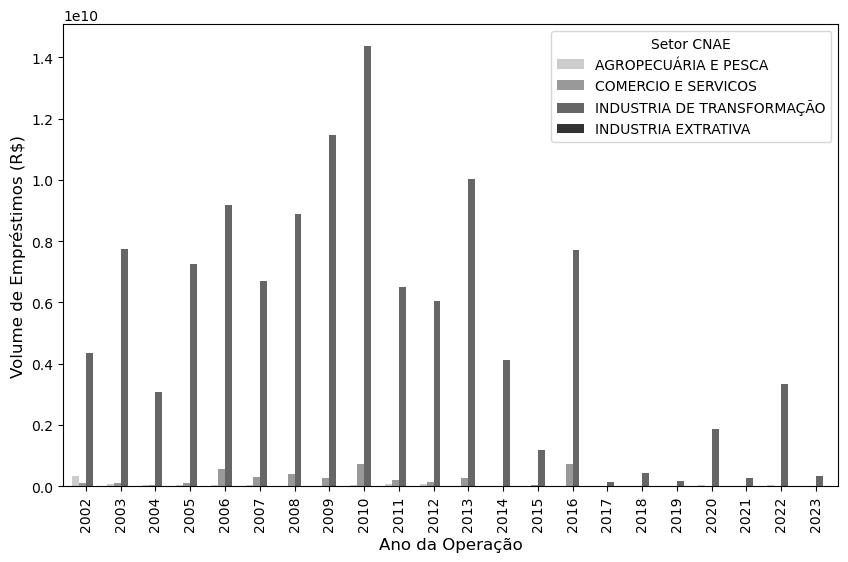

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supondo que 'df' é o seu DataFrame

# Convertendo a coluna de datas para o tipo datetime
df['Ano da Operação'] = pd.to_datetime(df['Ano da Operação'])

# Extraindo o ano da data
df['Year'] = df['Ano da Operação'].dt.year

# Agrupando os dados por ano e setor CNAE, e somando os valores desembolsados
agrupado = df.groupby(['Year', 'Setor CNAE'])['Valor Desembolsado em Reais'].sum().unstack(fill_value=0)

# Preparando as cores em escala de cinza
num_setores = len(agrupado.columns)
cores = [str(0.8 - i*(0.8/num_setores)) for i in range(num_setores)]

# Criando o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))
agrupado.plot(kind='bar', stacked=False, color=cores, ax=ax, width=0.8)

# Adicionando título e rótulos com tamanhos específicos
plt.xlabel('Ano da Operação', fontsize=12)
plt.ylabel('Volume de Empréstimos (R$)', fontsize=12)

# Adicionando a legenda
plt.legend(title='Setor CNAE', bbox_to_anchor=(0.8, 1), loc='left')

# Mostrando o gráfico
plt.show()


ValueError: ' left' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

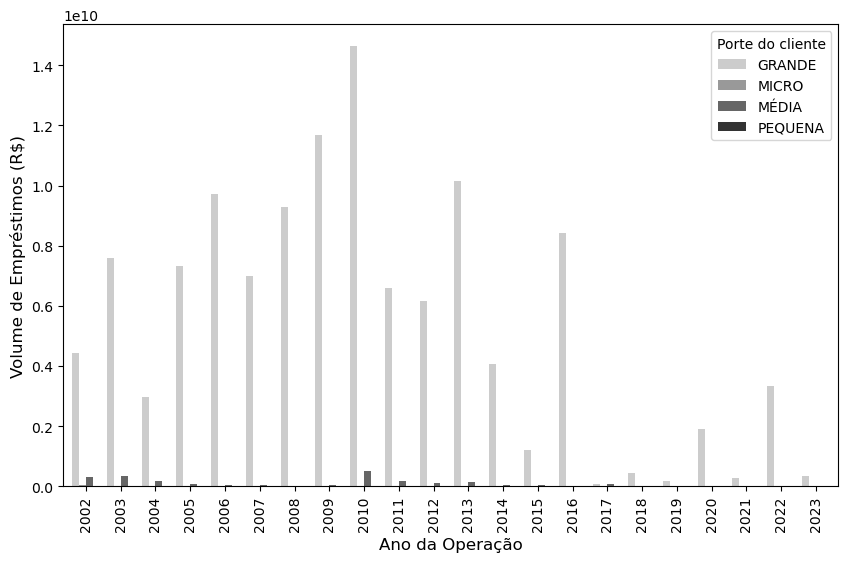

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supondo que 'df' é o seu DataFrame

# Convertendo a coluna de datas para o tipo datetime
df['Ano da Operação'] = pd.to_datetime(df['Ano da Operação'])

# Extraindo o ano da data
df['Year'] = df['Ano da Operação'].dt.year

# Agrupando os dados por ano e setor CNAE, e somando os valores desembolsados
agrupado = df.groupby(['Year', 'Porte do cliente'])['Valor Desembolsado em Reais'].sum().unstack(fill_value=0)

# Preparando as cores em escala de cinza
num_setores = len(agrupado.columns)
cores = [str(0.8 - i*(0.8/num_setores)) for i in range(num_setores)]

# Criando o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))
agrupado.plot(kind='bar', stacked=False, color=cores, ax=ax, width=0.8)

# Adicionando título e rótulos com tamanhos específicos
plt.xlabel('Ano da Operação', fontsize=12)
plt.ylabel('Volume de Empréstimos (R$)', fontsize=12)

# Adicionando a legenda
plt.legend(title='Porte do Cliente', bbox_to_anchor=(1.05, 1), loc=' left')

# Mostrando o gráfico
plt.show()


## Codificando colunas categóricas para análise de regressão

In [23]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# categorical_vars = ['Cliente', 'UF', 'Ano da Operação', 'Setor CNAE', 'Subsetor CNAE Agrupado', 'Porte do cliente', 'Natureza', 'Instituição Financeira Credenciada', 'Região']
# for col in categorical_vars:
#     df[col] = label_encoder.fit_transform(df[col])

In [24]:
# X = df.drop(columns = ['Cliente', 'Ano da Operação', 'Valor Desembolsado em Reais','Valor da Operação em R$', 'Year'], axis=1)

In [25]:
# df = df.drop(columns = ['Valor da Operação em R$', 'Year'], axis = 1)

In [26]:
df_dummy = df.drop(columns=['Valor Desembolsado em Reais', 'Subsetor CNAE Agrupado', 'Ano da Operação', 'Instituição Financeira Credenciada', 'Região', 'Year', 'Valor da Operação em R$'])
df_dummy = pd.get_dummies(df_dummy, drop_first=True)

## Regressão multivariada

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo a variável dependente
dependent_var = df['Valor Desembolsado em Reais']

In [28]:
# # Criando o modelo de regressão OLS
# model = sm.OLS(dependent_var, df_dummy)

# # Ajustando o modelo
# results = model.fit()

# # Exibindo o resumo dos resultados
# # results.summary()
# # Convert summary tables to DataFrame

# tables = results.summary().tables
# dataframes = [pd.DataFrame(table[1:], columns=table[0]) for table in tables]

# csv_path = 'Reg.csv'

# with open(csv_path, 'w') as f:
#     for i, df in enumerate(dataframes):
#         f.write(f"\nTable {i + 1}: {results.summary().extra_txt[i].strip()}\n")
        
#         df.to_csv(f, index=False)

#         f.write('\n')



## Logarítmica multivariada

In [29]:
# # Transformando a variável dependente em logaritmo
# dependent_var_log = np.log(df['Valor Desembolsado em Reais'] + 1)  # +1 para evitar log de zero


# # Criando o modelo de regressão OLS com a variável dependente transformada
# model_log = sm.OLS(dependent_var_log, df_dummy)

# # Ajustando o modelo
# results_log = model_log.fit()

# # Exibindo o resumo dos resultados
# # results_log.summary()
# tables = results_log.summary().tables
# dataframes = [pd.DataFrame(table[1:], columns=table[0]) for table in tables]

# csv_path = 'logReg.csv'

# with open(csv_path, 'w') as f:
#     for i, df in enumerate(dataframes):
#         f.write(f"\nTable {i + 1}: {results.summary().extra_txt[i].strip()}\n")
        
#         df.to_csv(f, index=False)

#         f.write('\n')



Interpretação: A interpretação dos coeficientes em uma regressão logarítmica muda. Um coeficiente agora representa a mudança percentual na variável dependente esperada para uma mudança de uma unidade na variável independente, mantendo as outras constantes.